https://www.springboard.com/blog/data-science-interview-questions/

In [131]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import pandas as pd 
import numpy as np 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

import matplotlib.pyplot as plt

# Stats

- Var / covar / correlation (spearman / pearson)
- sample mean tcl 
- CI
- hypothesis testing
- T vs Z test
- ANOVA and f test
- Monte carlo 
- Markov chain

### Variance

The variance of a random variable ${\displaystyle X}$ is the expected value of the squared deviation from the mean of ${\displaystyle X}$:

${\displaystyle \operatorname {Var} (X)=\operatorname {E} \left[(X-\operatorname {E} [X] )^{2}\right]} = \operatorname {E} [X^{2}]-\operatorname {E} [X]^{2}$

In [113]:
def var(x, show = False):
    mu = np.mean(x)
    if show: print('E[X] = {}'.format(mu))
    X_minus_mean = x - mu
    if show: print('X - E[X] = {}'.format(X_minus_mean))
    X_minus_mean_squared = X_minus_mean**2
    if show: print('(X - E[X])^2 = {}'.format(X_minus_mean_squared))
    v = np.mean(X_minus_mean_squared)
    if show: print('V[X] = {}'.format(v))
    return v

In [116]:
var([1,1,1], show = True)

E[X] = 1.0
X - E[X] = [0. 0. 0.]
(X - E[X])^2 = [0. 0. 0.]
V[X] = 0.0


0.0

In [114]:
var([0,1,2], show = True)

E[X] = 1.0
X - E[X] = [-1.  0.  1.]
(X - E[X])^2 = [1. 0. 1.]
V[X] = 0.6666666666666666


0.6666666666666666

### Covariance

In probability theory and statistics, covariance is a measure of the joint variability of two random variables.

If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive.

In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative. 

The sign of the covariance therefore shows the tendency in the linear relationship between the variables. 

The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. 

The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.

${\displaystyle \operatorname {cov} (X,Y)=\operatorname {E} {{\big [}(X-\operatorname {E} [X])(Y-\operatorname {E} [Y]){\big ]}}} = \operatorname {E} \left[XY\right]-\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right]	$


In [117]:
def covar(x,y, show = False):
    mu_x = np.mean(x)
    if show: print('E[X] = {}'.format(mu_x))
    mu_y = np.mean(y)
    if show: print('E[X] = {}'.format(mu_y))
    X_minus_mean = x - mu_x
    if show: print('X - E[X] = {}'.format(X_minus_mean))
    Y_minus_mean = y - mu_y
    if show: print('Y - E[Y] = {}'.format(Y_minus_mean))
    product = X_minus_mean*Y_minus_mean
    if show: print('(X - E[X])(Y - E[Y]) = {}'.format(product))
    cov = np.mean(product)
    if show: print('cov[X] = {}'.format(cov))
    return cov

In [107]:
covar([1,1,1],[0,1,2], show = True)

E[X] = 1.0
E[X] = 1.0
X - E[X] = [0. 0. 0.]
Y - E[Y] = [-1.  0.  1.]
(X - E[X])(Y - E[Y]) = [-0.  0.  0.]
cov[X] = 0.0


0.0

In [101]:
covar([2,1,0],[0,1,2], show = True)

E[X] = 1.0
E[X] = 1.0
X - E[X] = [ 1.  0. -1.]
Y - E[Y] = [-1.  0.  1.]
(X - E[X])(Y - E[Y]) = [-1.  0. -1.]
cov[X] = -0.6666666666666666


In [102]:
covar([0,1,2],[2,3,4], show = True)

E[X] = 1.0
E[X] = 3.0
X - E[X] = [-1.  0.  1.]
Y - E[Y] = [-1.  0.  1.]
(X - E[X])(Y - E[Y]) = [1. 0. 1.]
cov[X] = 0.6666666666666666


In [105]:
covar([0,1,2],[2,3,5], show = True)

E[X] = 1.0
E[X] = 3.3333333333333335
X - E[X] = [-1.  0.  1.]
Y - E[Y] = [-1.33333333 -0.33333333  1.66666667]
(X - E[X])(Y - E[Y]) = [ 1.33333333 -0.          1.66666667]
cov[X] = 1.0


### Pearson correlation coefficient

Pearson correlation coefficient is a measure of the linear correlation between two variables X and Y. According to the Cauchy–Schwarz inequality it has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$

In [120]:
def pearson(x,y):
    std_x = np.sqrt(var(x))
    std_y = np.sqrt(var(y))
    pearson = covar(x,y)/(std_x*std_y)
    return pearson

In [121]:
pearson([1,1,1],[0,1,2])

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


nan

In [123]:
pearson([2,1,0],[0,1,2])

-1.0

In [124]:
pearson([0,1,2],[2,3,4])

1.0

In [130]:
pearson([0,1,2],[2,3,5])

0.9819805060619659

### Spearman's rank correlation coefficient

Spearman's rank correlation coefficient is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.

For a sample of size n, the n raw scores ${\displaystyle X_{i},Y_{i}}$ are converted to ranks ${\displaystyle \operatorname {rg} X_{i},\operatorname {rg} Y_{i}}$, and $r_{s}$ is computed from:

${\displaystyle r_{s}=\rho _{\operatorname {rg} _{X},\operatorname {rg} _{Y}}={\frac {\operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}{\sigma _{\operatorname {rg} _{X}}\sigma _{\operatorname {rg} _{Y}}}}}$

where:
- $\rho $ denotes the usual Pearson correlation coefficient, but applied to the rank variables.
- ${\displaystyle \operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}$ is the covariance of the rank variables.
- ${\displaystyle \sigma _{\operatorname {rg} _{X}}}{\displaystyle \sigma _{\operatorname {rg} _{X}}}$ and ${\displaystyle \sigma}{\displaystyle \sigma }$ are the standard deviations of the rank variables.

## CLT

The central limit theorem establishes that, when identical independent random variables are added, their normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. 

Let ${X_1, …, X_n}$ be a random sample of size n—that is, a sequence of independent and identically distributed (i.i.d.) random variables drawn from a distribution of expected value given by µ and finite variance given by $σ^2$. 

Suppose we are interested in the sample average ${\displaystyle S_{n}={\frac {X_{1}+\cdots +X_{n}}{n}}}$
of these random variables. 

By the law of large numbers, the sample averages converge in probability and almost surely to the expected value µ as n → ∞. 

The classical central limit theorem describes the size and the distributional form of the stochastic fluctuations around the deterministic number µ during this convergence. More precisely, it states that as n gets larger, the distribution of the difference between the sample average $S_n$ and its limit µ, when multiplied by the factor √n (that is √n(Sn − µ)), approximates the normal distribution with mean 0 and variance $σ_2$: 

${\displaystyle {\sqrt {n}}\left(S_{n}-\mu \right)\ {\xrightarrow {d}}\ N\left(0,\sigma ^{2}\right).}$

# Unsupervised Learning

- Kmeans / Kmeans ++ / dendrogram / elbow method

## PCA

### Definition

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. 

This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. 

The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

1. The PCs are essentially the linear combinations of the original variables.
2. The PCs are orthogonal.
3. The least important PCs are also sometimes useful in regression, outlier detection, etc.

### Calculation

1. Normalize the data

2. Calculate the covariance matrix

3. Calculate the eigenvalues and eigenvectors of the covariance matrix

4. Choosing components and forming a feature vector:

We order the eigenvalues from largest to smallest so that it gives us the components in order or significance. Here comes the dimensionality reduction part. If we have a dataset with n variables, then we have the corresponding n eigenvalues and eigenvectors. It turns out that the eigenvector corresponding to the highest eigenvalue is the principal component of the dataset and it is our call as to how many eigenvalues we choose to proceed our analysis with. To reduce the dimensions, we choose the first p eigenvalues and ignore the rest. We do lose out some information in the process, but if the eigenvalues are small, we do not lose much.

Next we form a feature vector which is a matrix of vectors, in our case, the eigenvectors. In fact, only those eigenvectors which we want to proceed with. Since we just have 2 dimensions in the running example, we can either choose the one corresponding to the greater eigenvalue or simply take both.

$Feature Vector = (eig1, eig2)$

5. Forming Principal Components:

We take the transpose of the feature vector and left-multiply it with the transpose of scaled version of original dataset.

$NewData = FeatureVector^T x ScaledData^T$


Original number of features: 64
Reduced number of features: 2
Variance retained: [0.12033916 0.09561054]


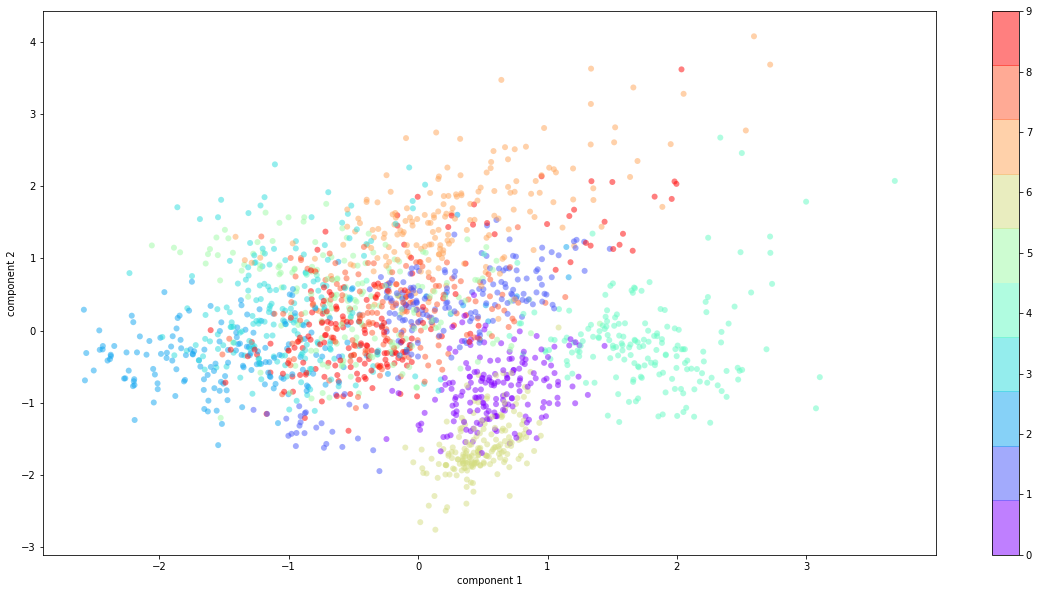

In [21]:
# Load Digits Data And Make Sparse
digits = datasets.load_digits()
# Standardize the feature matrix
X = StandardScaler().fit_transform(digits.data)
# Create a PCA with 2 components
pca = PCA(n_components=2, whiten=True)
# Conduct PCA
X_pca = pca.fit_transform(X)
print()
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])
print('Variance retained:', pca.explained_variance_ratio_)

plt.figure(figsize=(20,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

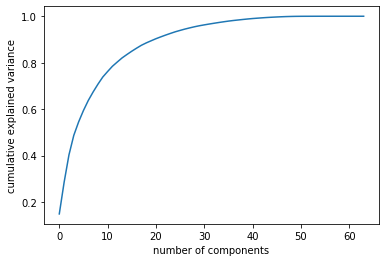

In [22]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Supervised learning

## Generalities 

- metrics
- regularization
- bagging / boosting / stacking

## Algorithms

- linear regression
- logistic regression
- neural network
- support vector machine
- decision tree
- random forest / GBM (gradient boosting machine)
- Naive Bayes
- bayesian method

## NLP

A word embedding is a learned representation for text where words that have the same meaning have a similar representation.

The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used.
The position of a word in the learned vector space is referred to as its embedding.
Two popular examples of methods of learning word embeddings from text include:
Word2Vec.
GloVe.

Keras offers an Embedding layer that can be used for neural networks on text data.
It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras.

It must specify 3 arguments:
input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

The Embedding layer has weights that are learned. If you save your model to file, this will include weights for the Embedding layer.
The output of the Embedding layer is a 2D vector with one embedding for each word in the input sequence of words (input document).

# Proba

- loi usuelles
- denombrement
- brain teaser

## Brain teaser 

- 2 Heads 1 tail, split the pot 1/4
- two children, one is a girl, proba the second is a girl ?
- revolver
- palantir
- google



# Languages comparison

https://www.geeksforgeeks.org/c-vs-java-vs-python/

https://www.javatips.net/blog/c-vs-java-vs-python-a-comparison


### Interpreted (python) vs compiled languages (C/Java)

The difference between an interpreted and a compiled language lies in the result of the process of interpreting or compiling. An interpreter produces a result from a program, while a compiler produces a program written in assembly language. The assembler of architecture then turns the resulting program into binary code. Assembly language varies for each individual computer, depending upon its architecture. Consequently, compiled programs can only run on computers that have the same architecture as the computer on which they were compiled.

### Python: pass by assignment

Remember that arguments are passed by assignment in Python. Since assignment just creates references to objects, there’s no alias between an argument name in the caller and callee, and so no call-by-reference per se. You can achieve the desired effect in a number of ways.

If you pass a mutable object into a method, the method gets a reference to that same object and you can mutate it to your heart's delight, but if you rebind the reference in the method, the outer scope will know nothing about it, and after you're done, the outer reference will still point at the original object.

If you pass an immutable object to a method, you still can't rebind the outer reference, and you can't even mutate the object.

### Python: id() 

This identity has to be unique and constant for this object during the lifetime. Two objects with non-overlapping lifetimes may have the same id() value. If we relate this to C, then they are actually the memory address, here in Python it is the unique id. This function is generally used internally in Python.

## Python: Mutable vs immutable

Common immutable type:
- numbers: int(), float(), complex()
- immutable sequences: str(), tuple(), frozenset(), bytes()

Common mutable type (almost everything else):
- mutable sequences: list(), bytearray()
- set type: set()
- mapping type: dict()
- classes, class instances
All immutable built-in objects in python are hashable. Mutable containers like lists and dictionaries are not hashable while immutable container tuple is hashable

Tuples are smaller. Tuples have structure, lists have order, set are list without order

# SQL


### What is a primary key?

A primary key is a combination of fields which uniquely specify a row. This is a special kind of unique key, and it has implicit NOT NULL constraint. It means, Primary key values cannot be NULL.

### What is a unique key?

A Unique key constraint uniquely identified each record in the database. This provides uniqueness for the column or set of columns.

A Primary key constraint has automatic unique constraint defined on it. But not, in the case of Unique Key.

There can be many unique constraint defined per table, but only one Primary key constraint defined per table.

### What is a foreign key?

A foreign key is one table which can be related to the primary key of another table. Relationship needs to be created between two tables by referencing foreign key with the primary key of another table.

### What is a constraint?

Constraint can be used to specify the limit on the data type of table. Constraint can be specified while creating or altering the table statement. Sample of constraint are.

- NOT NULL.
- CHECK.
- DEFAULT.
- UNIQUE.
- PRIMARY KEY.
- FOREIGN KEY.

### Which operator is used in query for pattern matching?

LIKE operator is used for pattern matching, and it can be used as -.

- % - Matches zero or more characters.
- _ – Matching exactly one character.


`Select * from Student where studentname like 'a%'`

`Select * from Student where studentname like ‘ami_'`

### What is Union, minus and Interact commands?

UNION operator is used to combine the results of two tables, and it eliminates duplicate rows from the tables.

MINUS/EXEPT operator is used to return rows from the first query but not from the second query. 

INTERSECT operator is used to return rows returned by both the queries.